# Tutorial

## Install the required software (DeePMD-JAX)

In [2]:
!pip install --upgrade pip
!git clone https://github.com/AMLS-PRG/deepmd-jax
%cd deepmd-jax
!pip install -e .
%cd ..
!export JAX_PLATFORM_NAME=cpu

Cloning into 'deepmd-jax'...
remote: Enumerating objects: 798, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 798 (delta 114), reused 105 (delta 98), pack-reused 668 (from 1)
Receiving objects: 100% (798/798), 1.17 MiB | 9.11 MiB/s, done.
Resolving deltas: 100% (484/484), done.
/content/deepmd-jax
Obtaining file:///content/deepmd-jax
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/google/jax-md.git to /tmp/pip-install-zwwypmtv/jax-md_e694326e4f544033b143047a46cc3c77
  Running command git clone --filter=blob:none --quiet https://github.com/google/jax-md.git /tmp/pip-install-zwwypmtv/jax-md_e694326e4f544033b143047a46cc3c77
  Resolved https://github.com/google/jax-md.git to commit a2c11c18ce65606983824c5cb0d17f5569abb3a1
  Installing 

## Import functions

In [15]:
from deepmd_jax.train import train, test, evaluate
import numpy as np
from ase import Atoms
from ase.visualize import view
import pandas as pd
import matplotlib.pyplot as plt
import os

## Download repository with dataset

In [17]:
!git clone https://github.com/TheoryGroupNanoGUNE/nanogune-winter-school-2026

Cloning into 'nanogune-winter-school-2026'...
remote: Enumerating objects: 396, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 396 (delta 0), reused 4 (delta 0), pack-reused 388 (from 2)
Receiving objects: 100% (396/396), 103.91 MiB | 18.15 MiB/s, done.
Resolving deltas: 100% (64/64), done.
Updating files: 100% (266/266), done.


In [8]:
# What's inside our dataset?
contents = os.listdir('./nanogune-winter-school-2026/tutorial-3/A-training/training-set')
print(contents)

['1bar-310K', '1bar-275K', 'iteration-3', '1bar-270K', 'multithermal', '1bar-265K', '1bar-290K', 'iteration-1', 'crystallization', '1bar-260K', '1bar-300K', '1bar-280K', 'iteration-2']


In [9]:
# Let's see the contents of one directory
data_path = "./nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-310K"
contents = os.listdir(data_path)
print(contents)

['force.raw', 'energy.raw', 'coord.raw', 'type.raw', 'set.000', 'box.raw']


In [10]:
#Let's see what's inside each file
df = pd.read_table(data_path + "/force.raw", nrows=4, header=None)
df.head()

,0
0,0.36033933672326973 -0.42243147806832404 -0.16...
1,1.515681511527951 0.4013546027933668 -0.297029...
2,-0.16202217947348868 -1.045966674992631 1.1181...
3,0.5260600480942682 -0.19688299590641575 0.4682...


In [11]:
# Visualize structure
data_path = "./nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-310K"
frame_index=0
initial_position = np.genfromtxt(data_path + "/coord.raw")[frame_index,:].reshape(-1,3)
box = np.genfromtxt(data_path + "/box.raw")[0,:].reshape(3,3)
type_idx = np.genfromtxt(data_path + "/type.raw")
type_map = {0: "O", 1: "H"}
symbols = [type_map[i] for i in type_idx]
atoms = Atoms(
    symbols=symbols,
    positions=initial_position,
    cell=box,
    pbc=True
)
view(atoms,viewer='x3d')

## Train a model for the PES using this dataset

In [14]:
data_paths=[
          "./nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-260K",
          "./nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-265K",
          "./nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-270K",
          "./nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-275K",
          "./nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-280K",
          "./nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-290K",
          "./nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-300K",
          "./nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-310K",
          ]

In [13]:
train(
      model_type='energy',              # Model type
      rcut=6.0,                              # Cutoff radius
      save_path='model.pkl',  # Path to save the trained model
      progress_path='progress.out',  # Path to save the training progress
      step=2,                          # Number of training steps
      print_every = 1,
      train_data_path=data_paths
)

# Dataset loaded: 10 frames/864 atoms. Path: 
# 	'/content/nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-260K'
# Dataset loaded: 11 frames/864 atoms. Path: 
# 	'/content/nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-265K'
# Dataset loaded: 10 frames/864 atoms. Path: 
# 	'/content/nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-270K'
# Dataset loaded: 6 frames/864 atoms. Path: 
# 	'/content/nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-275K'
# Dataset loaded: 7 frames/864 atoms. Path: 
# 	'/content/nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-280K'
# Dataset loaded: 10 frames/864 atoms. Path: 
# 	'/content/nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-290K'
# Dataset loaded: 10 frames/864 atoms. Path: 
# 	'/content/nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-300K'
# Dataset loaded: 9 frames/864 atoms. Path: 
# 	'/content/nanogune-wint

In [40]:
progress = np.genfromtxt("./nanogune-winter-school-2026/tutorial-3/A-training/result/progress.out",skip_header=1)

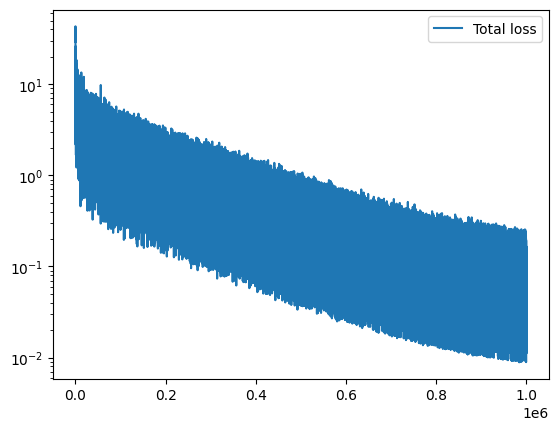

In [48]:
plt.plot(progress[:,0],progress[:,1],label="Total loss")
plt.yscale("log")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.show()

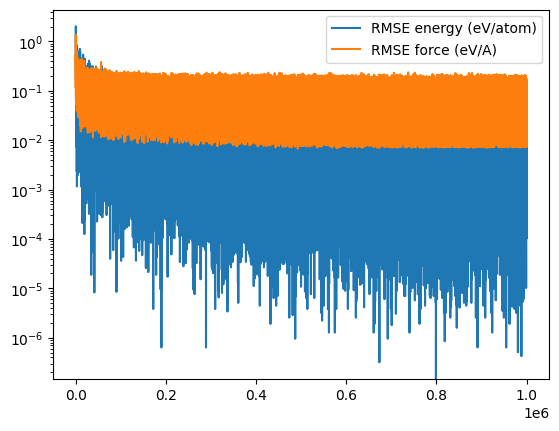

In [49]:
plt.plot(progress[:,0],progress[:,2],label="RMSE energy (eV/atom)")
plt.plot(progress[:,0],progress[:,3],label="RMSE force (eV/A)")
plt.yscale("log")
plt.ylabel("RMS errors")
plt.xlabel("Iterations")
plt.legend()
plt.show()

## Test model performance

In [19]:
model_path="./nanogune-winter-school-2026/tutorial-3/A-training/result/model.pkl"
for data_path in data_paths[:1]:
    rmse, predictions, ground_truth = test(model_path, data_path)
    Natoms=predictions['force'].shape[1]
    print(np.sqrt(np.mean(np.power(predictions['energy']-ground_truth['energy'],2)))*1000/Natoms, " meV/atom")
    print(np.sqrt(np.mean(np.power(predictions['force'].flatten()-ground_truth['force'].flatten(),2)))*1000, " meV/A")

# Model loaded from './nanogune-winter-school-2026/tutorial-3/A-training/result/model.pkl'.
# Dataset loaded: 10 frames/864 atoms. Path: 
# 	'/content/nanogune-winter-school-2026/tutorial-3/A-training/training-set/1bar-260K'
# Lattice vectors for neighbor images: Max 1 out of 1 candidates.
0.19511145  meV/atom
83.03099  meV/A


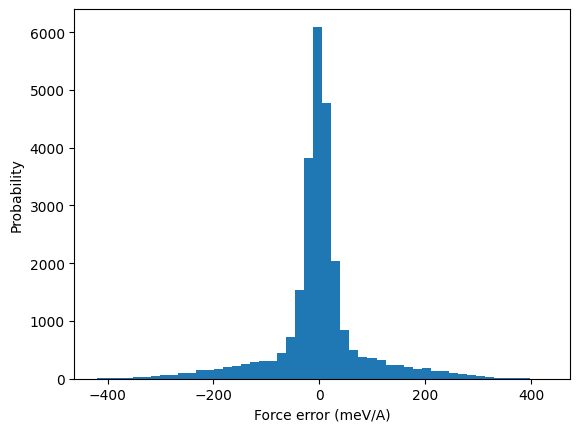

In [26]:
plt.hist((predictions['force'].flatten()-ground_truth['force'].flatten())*1000,bins=50)
plt.xlabel("Force error (meV/A)")
plt.ylabel("Probability")
plt.show()

## Questions:
- What information is needed to train an atomistic machine learning model for the PES (potential)?
- What are typical errors in the energies and forces?
- How large are typical training sets?